# MATH 3375 Examples Notebook #23

# Non-Parametric Tests

Many common statistical tests use distributions (such as the t-test) that may focus on the mean or standard deviation, or the test may have underlying assumptions that may not be a good fit (e.g., the assumption of normally distributed data). There are a number of alternative tests that  include simulation-based tests and non-parametric tests. 

## 1. McNemar's Test

This test performs a comparison between 2 treatments, but for a binary result (whereas t-tests compare means for quantitative results). It is different from a 2-proportion z-test, because: 
1. A 2-proportion z-test assumes each observation is independent, whereas McNemar's Test works on paired data (each observation in the first sample is paired with (related or identical to) a corresponding observation in the second sample.
2. A 2-proportion z-test can only compare the overall proportion of a given outcome between the 2 groups (because all observations are independent). McNemar's Test focuses on the frequency of disparate results for each set of paired observations.

#### Background:
100 patients are infected with a virus. It is possible that each patient has a slightly different mutation of the virus. Samples are drawn from each of the 100 patients, and 2 cultures are prepared for each patient.  For each patient, one culture is treated with Treatment A and the other is treated with Treatment B. 

* Treatment A successfully eradicated the virus in 61 of the 100 cases.
* Treatment B successfully eradicated the virus in 61 of the 100 cases.

Note that it is not sufficient to compare the proportion of successes in each case (as we would in a 2-proportion z-test.) See the 2 possible scenarios below for a better illustration of how McNemar's Test is different (and more powerful).

#### Results: Scenario 1

* 32 cases: Neither treatment worked
* 61 cases: Both treatments worked
* 7 cases: B worked, A did not
* 0 cases: A worked, B did not

#### Results: Scenario 2

* 12 cases: Neither treatment worked
* 41 cases: Both treatments worked
* 27 cases: B worked, A did not
* 20 cases: A worked, B did not


In [1]:
# Set up outcome matrix, Scenario 1

data_tbl_1 <- matrix(c(61,0,7,32), ncol=2, byrow=TRUE)
colnames(data_tbl_1) <- c('B Worked', 'B Did Not')
rownames(data_tbl_1) <- c('A Worked', 'A Did Not')

data_tbl_1

,B Worked,B Did Not
A Worked,61,0
A Did Not,7,32


In [2]:
# Run McNemar's Test
mcnemar.test(data_tbl_1)


	McNemar's Chi-squared test with continuity correction

data:  data_tbl_1
McNemar's chi-squared = 5.1429, df = 1, p-value = 0.02334


In [3]:
# Set up outcome matrix, Scenario 2

data_tbl_2 <- matrix(c(41,20,27,12), ncol=2, byrow=TRUE)
colnames(data_tbl_2) <- c('B Worked', 'B Did Not')
rownames(data_tbl_2) <- c('A Worked', 'A Did Not')

data_tbl_2

,B Worked,B Did Not
A Worked,41,20
A Did Not,27,12


In [4]:
# Run McNemar's Test
mcnemar.test(data_tbl_2)


	McNemar's Chi-squared test with continuity correction

data:  data_tbl_2
McNemar's chi-squared = 0.76596, df = 1, p-value = 0.3815


### Test Results

Scenario 1 would provide sufficient evidence that Treatment B is better, with $p \approx 0.02 \lt 0.05$.

Scenario 2 would **not** provide sufficient evidence that either treatment is better, with $p \approx 0.38 \ge 0.05$.


## 2. Wilcoxon Signed Rank Test

This test focuses on medians rather than means. This is especially useful for non-normal data or data with outliers or skewed distributions (where mean and standard deviation are heavily influenced by outliers or skewness).

### Two variations of the test:

#### a. Compare median of sample to specific value
Application is analogous to 1-sample t-test, but focusing on median instead of mean.



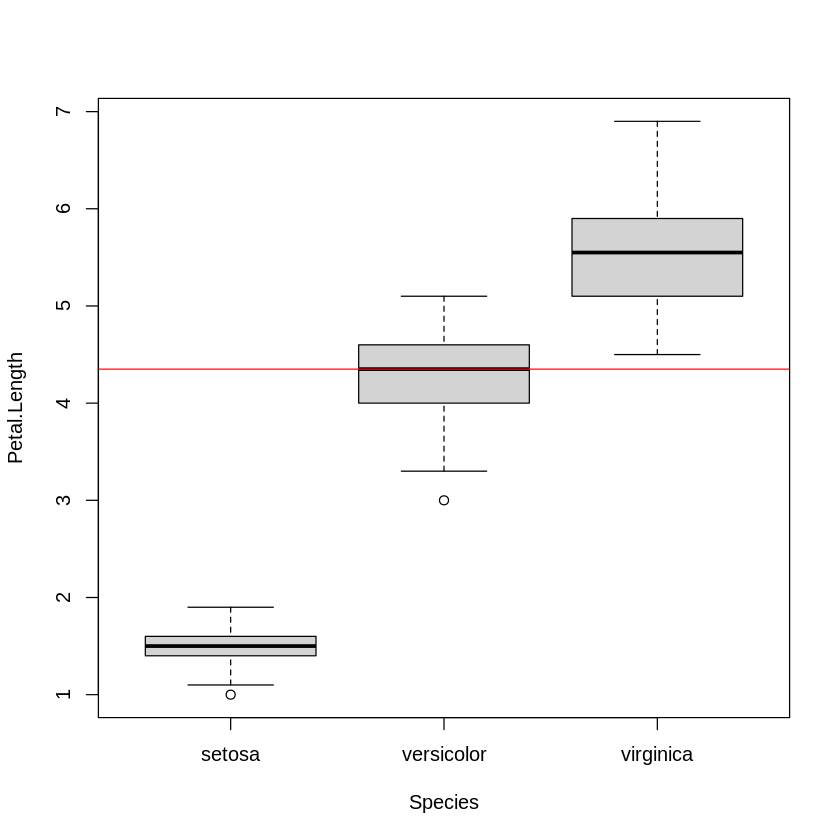

In [5]:
#Example with single sample: petal length of iris sample

M = median(iris$Petal.Length)
boxplot(Petal.Length~Species,data=iris)
abline(h=M,col="red")



In [6]:
#Test each species separately

Petal.setosa <- iris$Petal.Length[iris$Species=="setosa"]
Petal.versicolor <- iris$Petal.Length[iris$Species=="versicolor"]
Petal.virginica <- iris$Petal.Length[iris$Species=="virginica"]

wilcox.test(Petal.setosa, mu=M)
wilcox.test(Petal.versicolor, mu=M)
wilcox.test(Petal.virginica, mu=M)


	Wilcoxon signed rank test with continuity correction

data:  Petal.setosa
V = 0, p-value = 6.415e-10
alternative hypothesis: true location is not equal to 4.35



	Wilcoxon signed rank test with continuity correction

data:  Petal.versicolor
V = 576.5, p-value = 0.5588
alternative hypothesis: true location is not equal to 4.35



	Wilcoxon signed rank test with continuity correction

data:  Petal.virginica
V = 1275, p-value = 7.579e-10
alternative hypothesis: true location is not equal to 4.35



#### b. Compare median of 2 _paired_ samples to each other
Application is analogous to matched pairs t-test, but focusing on median instead of mean.

The scenario below compares reaction times for participants' left and right hands in a computer-based task.

Null hypothesis: Median difference in reaction time is zero
Alternative: Median difference in reaction time is NOT zero

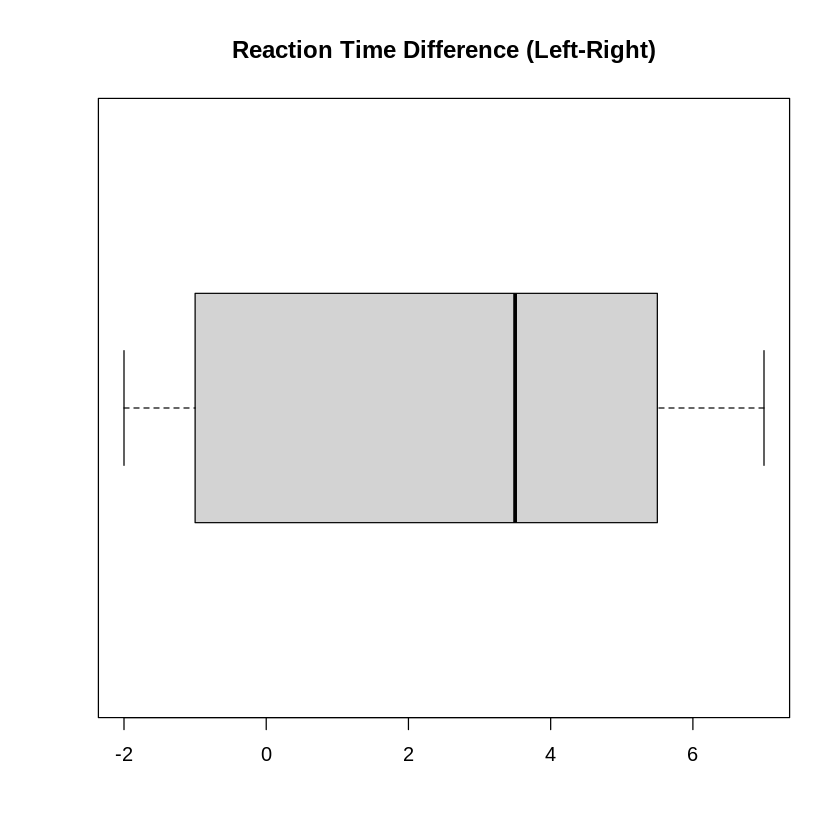

In [7]:
left <- c(50, 47, 62, 81, 77, 49, 56, 78)
right <- c(45, 48, 64, 82, 74, 42, 52, 72)

boxplot (left-right,horizontal=TRUE,main="Reaction Time Difference (Left-Right)")


In [8]:
#Non-Parametric Test for Median Difference

wilcox.test(left,right, paired = TRUE, exact=FALSE)


	Wilcoxon signed rank test with continuity correction

data:  left and right
V = 30, p-value = 0.1069
alternative hypothesis: true location shift is not equal to 0


## 3. Mann-Whitney Test

This test is analogous to a 2-Sample t-test for independent samples, but focusing on median instead of mean. It is a variant of the Wilcoxon Rank Test.

We demonstrate below using a test to compare median horsepower and mpg between manual and automatic transmission cars.

Notice how the test compares to the t-test in each case.


In [9]:
head(mtcars,3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


#### Tests for Horsepower: Median and Mean

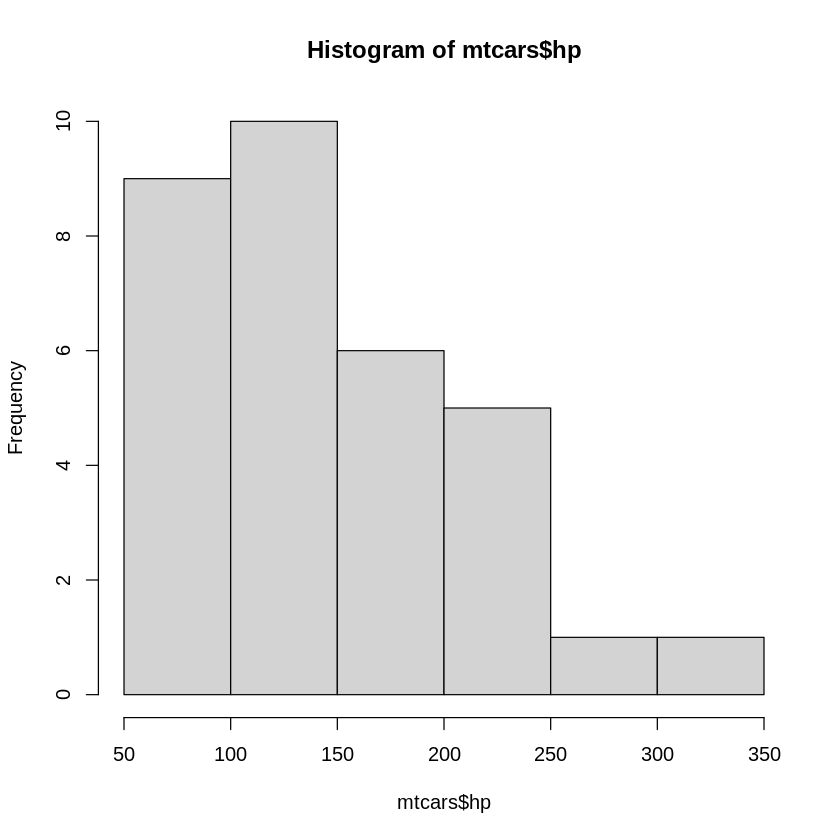

In [10]:
hist(mtcars$hp)

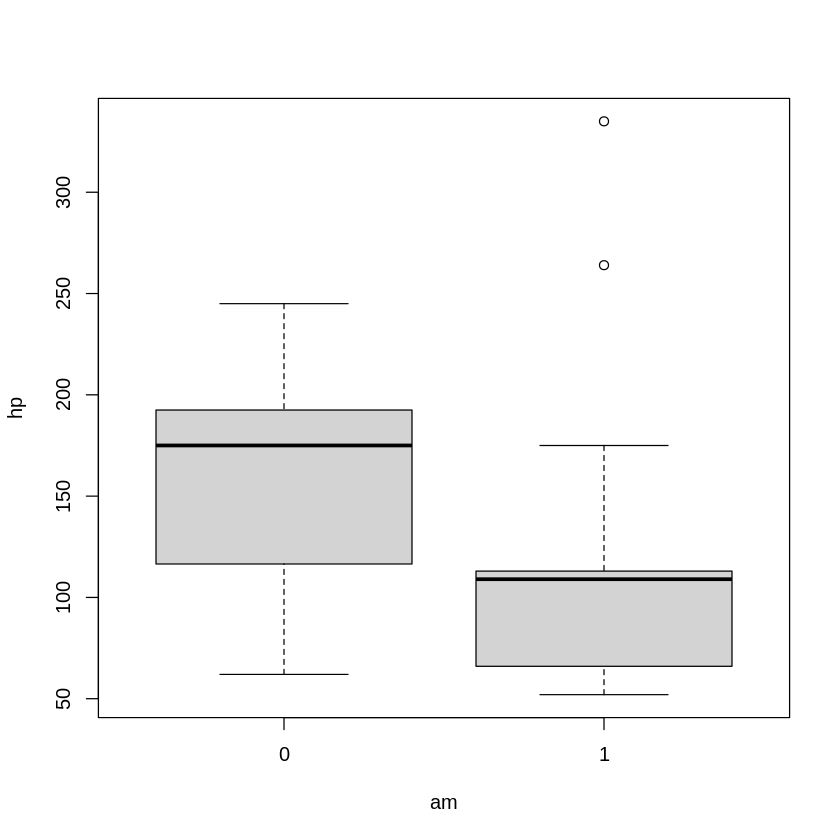

In [11]:
boxplot(hp~am,data=mtcars)

In [12]:
# Median test (non-parametric)
wilcox.test(hp~am,data=mtcars,exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  hp by am
W = 176, p-value = 0.0457
alternative hypothesis: true location shift is not equal to 0


In [13]:
# Mean test (parametric)
t.test(hp~am,data=mtcars,exact=FALSE)


	Welch Two Sample t-test

data:  hp by am
t = 1.2662, df = 18.715, p-value = 0.221
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21.87858  88.71259
sample estimates:
mean in group 0 mean in group 1 
       160.2632        126.8462 


##### Observations
Notice that the t-test was not significant for the comparison, but the Mann Whitney test was. This is related to the strongly skewed distribution and presence of outliers for the horsepower variable.


#### Tests for MPG: Median and Mean

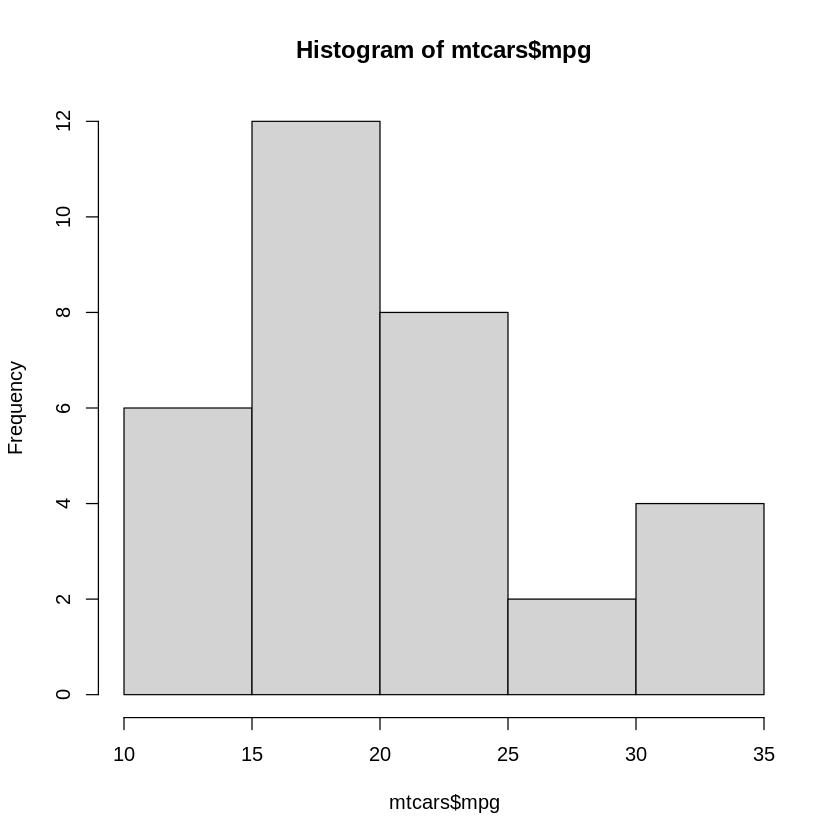

In [14]:
hist(mtcars$mpg)

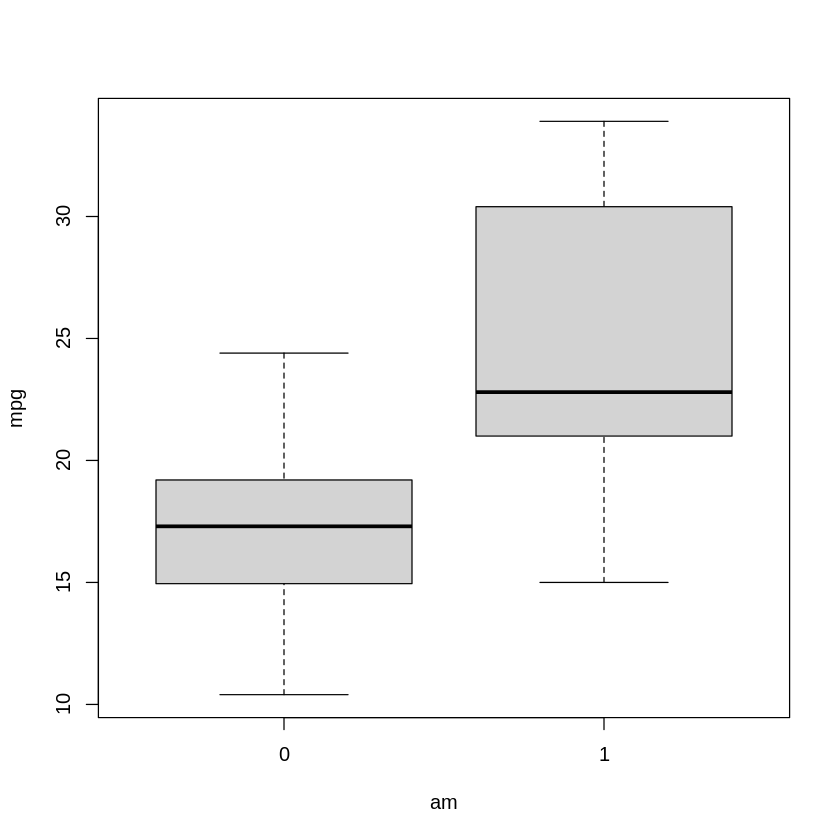

In [15]:
boxplot(mpg~am,data=mtcars)

In [16]:
wilcox.test(mpg~am,data=mtcars,exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  mpg by am
W = 42, p-value = 0.001871
alternative hypothesis: true location shift is not equal to 0


In [17]:
t.test(mpg~am,data=mtcars,exact=FALSE)


	Welch Two Sample t-test

data:  mpg by am
t = -3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.280194  -3.209684
sample estimates:
mean in group 0 mean in group 1 
       17.14737        24.39231 


##### Observations
Notice that for MPG, the distribution was closer to symmetric with no outliers. In this case, the t-test and Mann Whitney test were both able to detect a significant difference. 
